In [1]:
#The credit card department has been using a data-driven system for credit assessment called Credit Scoring 
#for many years, and the model is known as an application scorecard. A credit card application's cutoff value 
#is determined using the application scorecard, which also aids in estimating the applicant's level of risk. 
#This decision is made based on strategic priority at a given time.

# Machine Learning Development LifeCycle (MLDLC)
#1. Data Preprocessing
#2. Explorartory Data Analysis (EDA)
#3. Handling Missing Values & Outliers
#4. Feature Engineering & Feature Transformation
#5. Model Traning & Model Selection
#6. Testing & Optimizing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score ,roc_auc_score, classification_report, confusion_matrix

In [4]:
credit_card_data = pd.read_csv('/credit_card/Credit_card.csv')
credit_card_data.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [5]:
credit_card_data.shape

(1548, 18)

In [6]:
#Label:
#0 is application approved
#1 is application rejected
credit_card_label = pd.read_csv('/credit_card/Credit_card_label.csv')
credit_card_label

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1
...,...,...
1543,5028645,0
1544,5023655,0
1545,5115992,0
1546,5118219,0


In [7]:
credit_card_label.shape

(1548, 2)

In [8]:
credit_df = pd.merge(credit_card_data, credit_card_label,  how='inner', on='Ind_ID')
credit_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0


In [9]:
credit_df.duplicated().sum()
#credit_df.duplicated() tells true or false. '.sum()' tells how many duplicates are there

0

In [10]:
credit_df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

In [11]:
credit_df.rename(columns={
       'Ind_ID': 'client_id', 'GENDER': 'gender','Car_Owner': 'car_owner','Propert_Owner': 'property_owner',
       'CHILDREN': 'number_of_children','Annual_income':'annual_income', 'Type_Income':'income_type', 
       'EDUCATION':'education', 'Marital_status':'marital_status','Housing_type':'housing_type',
       'Birthday_count':'birthday_count', 'Employed_days':'employed_days', 'Mobile_phone':'mobile_phone',
       'Work_Phone':'work_phone', 'Phone':'phone', 'EMAIL_ID':'email_id', 'Type_Occupation':'occupation_type', 
       'Family_Members':'number_of_family_members' }, inplace=True)
credit_df.columns

Index(['client_id', 'gender', 'car_owner', 'property_owner',
       'number_of_children', 'annual_income', 'income_type', 'education',
       'marital_status', 'housing_type', 'birthday_count', 'employed_days',
       'mobile_phone', 'work_phone', 'phone', 'email_id', 'occupation_type',
       'number_of_family_members', 'label'],
      dtype='object')

In [12]:
#Create a column Age with the current age using the column value from birthday_count
credit_df['age_in_years'] = np.abs((credit_df['birthday_count']/365))

In [13]:
# credit_df['years_of_experience'] = np.abs((credit_df['employed_days']/365))
credit_df['years_of_experience'] = np.where(credit_df['employed_days'] < 0, np.abs(credit_df['employed_days'] / 365), np.nan)
credit_df[credit_df['employed_days']>0].shape

#There are 261 records which are unemployed.

(261, 21)

In [14]:
credit_df

,client_id,gender,car_owner,property_owner,number_of_children,annual_income,income_type,education,marital_status,housing_type,...,employed_days,mobile_phone,work_phone,phone,email_id,occupation_type,number_of_family_members,label,age_in_years,years_of_experience
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,...,365243,1,0,0,0,NaN,2,1,51.430137,NaN
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.142466,1.605479
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,NaN,1.605479
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.142466,1.605479
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,...,-586,1,1,1,0,NaN,2,1,37.142466,1.605479
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,...,-2182,1,0,0,0,Managers,2,0,32.758904,5.978082
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,...,-1209,1,0,0,0,Accountants,1,0,28.024658,3.312329
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,...,-2477,1,0,0,0,Managers,4,0,36.093151,6.786301
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,...,-645,1,1,1,0,Drivers,2,0,41.895890,1.767123


In [15]:
#Insert a column 'Employed or Unemployed'
credit_df['employment_status'] = credit_df['employed_days'].apply(lambda x: 'Employed' if x < 0 else 'Unemployed')


columns_to_display = ['client_id', 'employed_days','age_in_years',
       'years_of_experience', 'employment_status']
df_subset = credit_df[columns_to_display]
df_subset

,client_id,employed_days,age_in_years,years_of_experience,employment_status
0,5008827,365243,51.430137,NaN,Unemployed
1,5009744,-586,37.142466,1.605479,Employed
2,5009746,-586,NaN,1.605479,Employed
3,5009749,-586,37.142466,1.605479,Employed
4,5009752,-586,37.142466,1.605479,Employed
...,...,...,...,...,...
1543,5028645,-2182,32.758904,5.978082,Employed
1544,5023655,-1209,28.024658,3.312329,Employed
1545,5115992,-2477,36.093151,6.786301,Employed
1546,5118219,-645,41.895890,1.767123,Employed


In [16]:
unemployed_count = credit_df['employment_status'].value_counts().get('Unemployed',0)
unemployed_count

261

In [17]:
#Missing Values
credit_df.isnull().sum()


# Missing values in the below features:
# gender
# annual_income
# birthday_count
# occupation_type
# age_in_years

client_id                     0
gender                        7
car_owner                     0
property_owner                0
number_of_children            0
annual_income                23
income_type                   0
education                     0
marital_status                0
housing_type                  0
birthday_count               22
employed_days                 0
mobile_phone                  0
work_phone                    0
phone                         0
email_id                      0
occupation_type             488
number_of_family_members      0
label                         0
age_in_years                 22
years_of_experience         261
employment_status             0
dtype: int64

In [18]:
# Explorartory Data Analysis (EDA)

In [19]:
credit_df.columns

Index(['client_id', 'gender', 'car_owner', 'property_owner',
       'number_of_children', 'annual_income', 'income_type', 'education',
       'marital_status', 'housing_type', 'birthday_count', 'employed_days',
       'mobile_phone', 'work_phone', 'phone', 'email_id', 'occupation_type',
       'number_of_family_members', 'label', 'age_in_years',
       'years_of_experience', 'employment_status'],
      dtype='object')

In [20]:
credit_df['number_of_children'].nunique()

6

In [21]:
# List of Categorical Variables

# Nominal: gender, car_owner, property_owner, income_type, marital_status, housing_type, mobile_phone,
# work_phone, phone, email_id, occupation_type, label, employment_status
# Ordinal: education


# Discrete Numerical Variables: number_of_children, annual_income, birthday_count, employed_days, number_of_family_members, 
# age_in_years,years_of_experience 

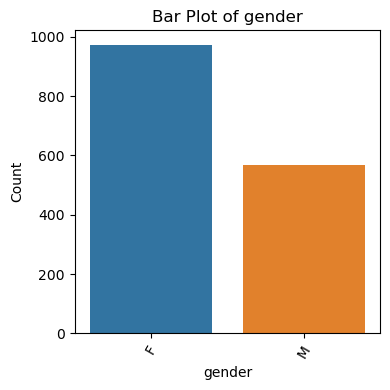

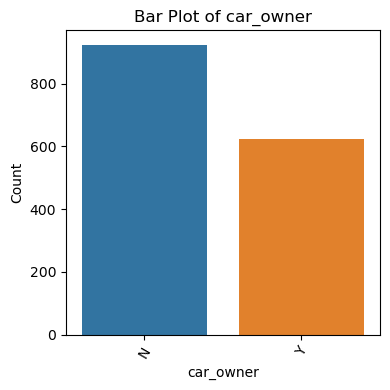

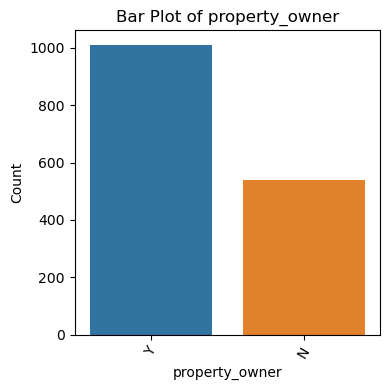

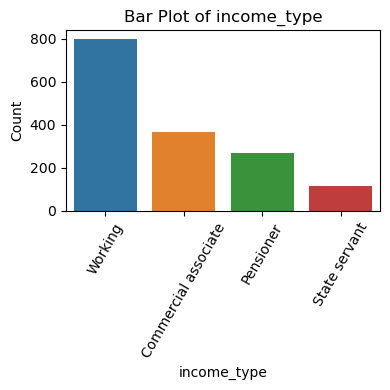

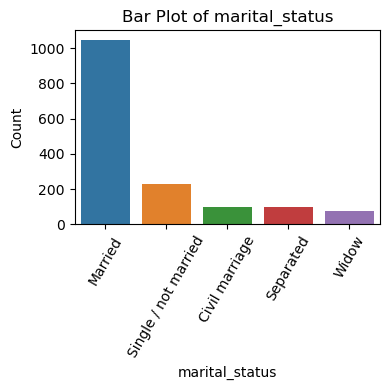

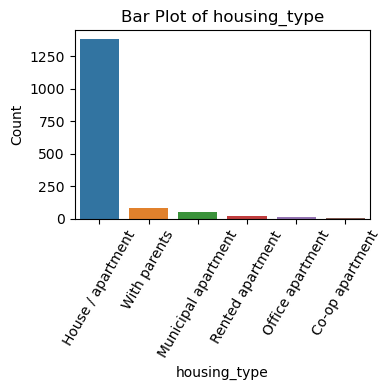

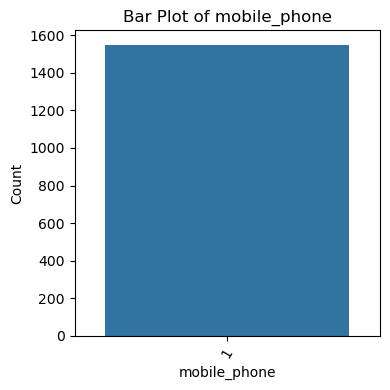

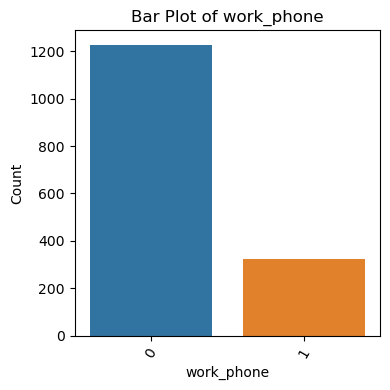

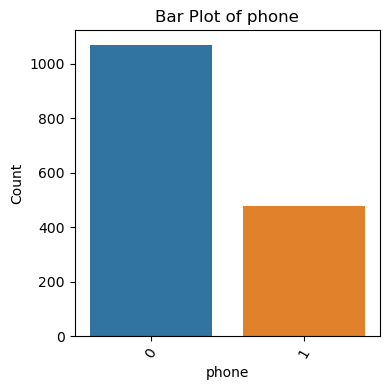

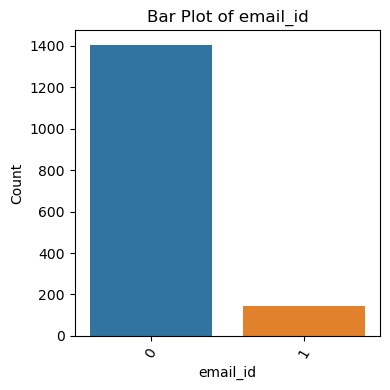

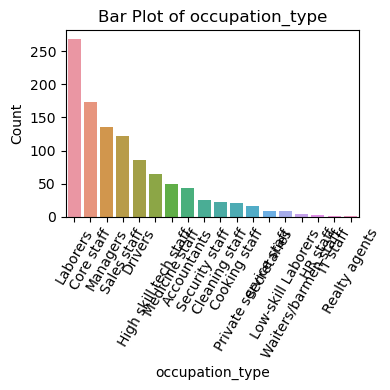

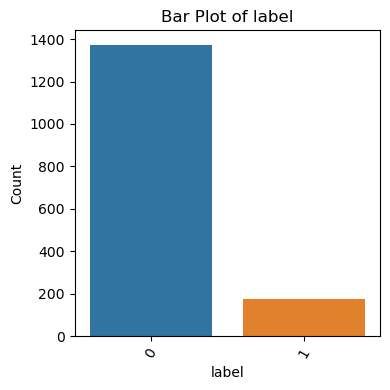

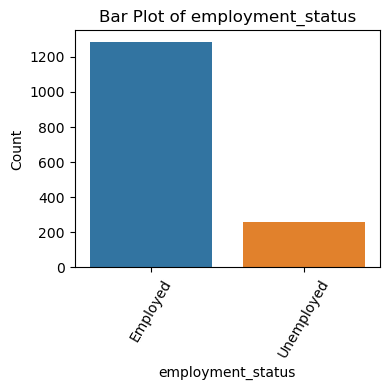

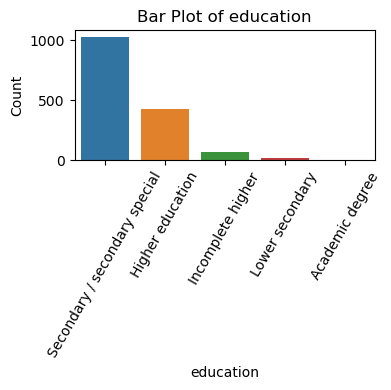

In [22]:
#Bar chart for Nominal Variables


# Plots bar graphs for the specified categorical columns in the DataFrame.
# Parameters:
# credit_df (pd.DataFrame): The DataFrame containing the data.
# columns (list): A list of column names to be plotted.

def plot_bargraph(credit_df, columns):
    for column in columns:
        plt.figure(figsize=(4, 4))
        sns.countplot(data=credit_df, x=column, order=credit_df[column].value_counts().index)
        plt.title(f'Bar Plot of {column}')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.xticks(rotation=60)  # Rotate x labels for better readability
        plt.tight_layout()  # Adjust plot to fit into the figure area
        plt.show()

nominal_columns = ['gender', 'car_owner', 'property_owner', 'income_type', 'marital_status', 'housing_type', 
                   'mobile_phone', 'work_phone', 'phone', 'email_id', 'occupation_type', 'label', 'employment_status']


ordinal_columns = ['education']



plot_bargraph(credit_df, nominal_columns)
plot_bargraph(credit_df, ordinal_columns)


    

In [23]:
# Inferences:

# 1) The dataset shows a higher proportion of female applicants,
#    indicating that more females are applying for credit cards.
# 2) A significant majority of individuals in the dataset do not own a car, 
#    which could be due to various factors such as personal preferences.
# 3) Most individuals in the dataset are property owners, 
#    suggesting that property ownership might play a crucial role in credit card approval decisions.
# 4) The predominant income type is "Working," followed by "Commercial associate" and "Pensioner," 
#    while categories like "State servant" have notably fewer representatives.
# 5) Most individuals in the dataset are "Married," while "Single / not married," "Civil marriage," 
#    "Separated," and "Widow" appear in decreasing order of frequency.
# 6) As for housing, the majority reside in a "House / apartment".
# 7) Mostly are employed and have have acquired secondary education.
# 8) Label- 0 is application approved and 1 is application rejected.
#    This clearly shows that this isimbalanced dataset as there is a huge difference 
#    between approved (0) and rejected (1) applications.


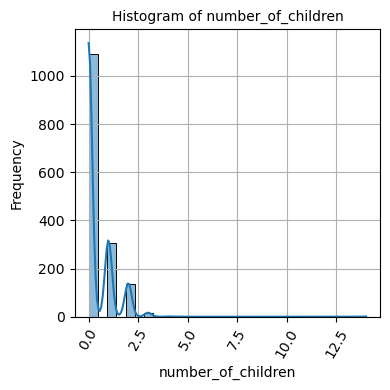

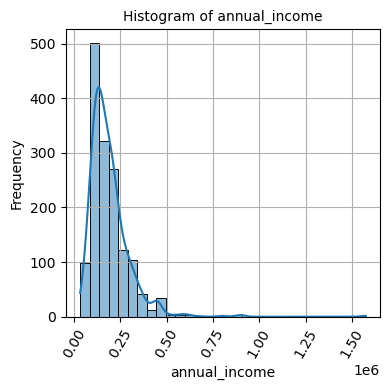

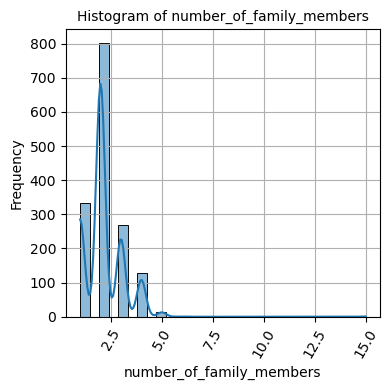

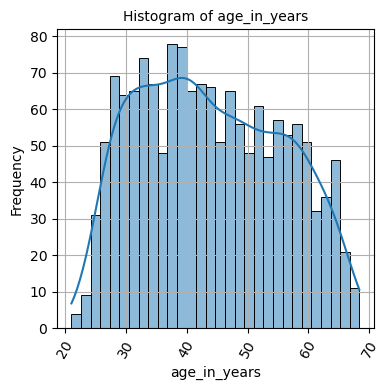

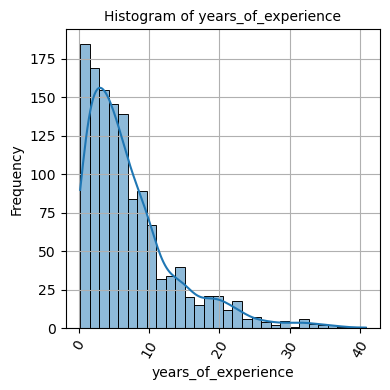

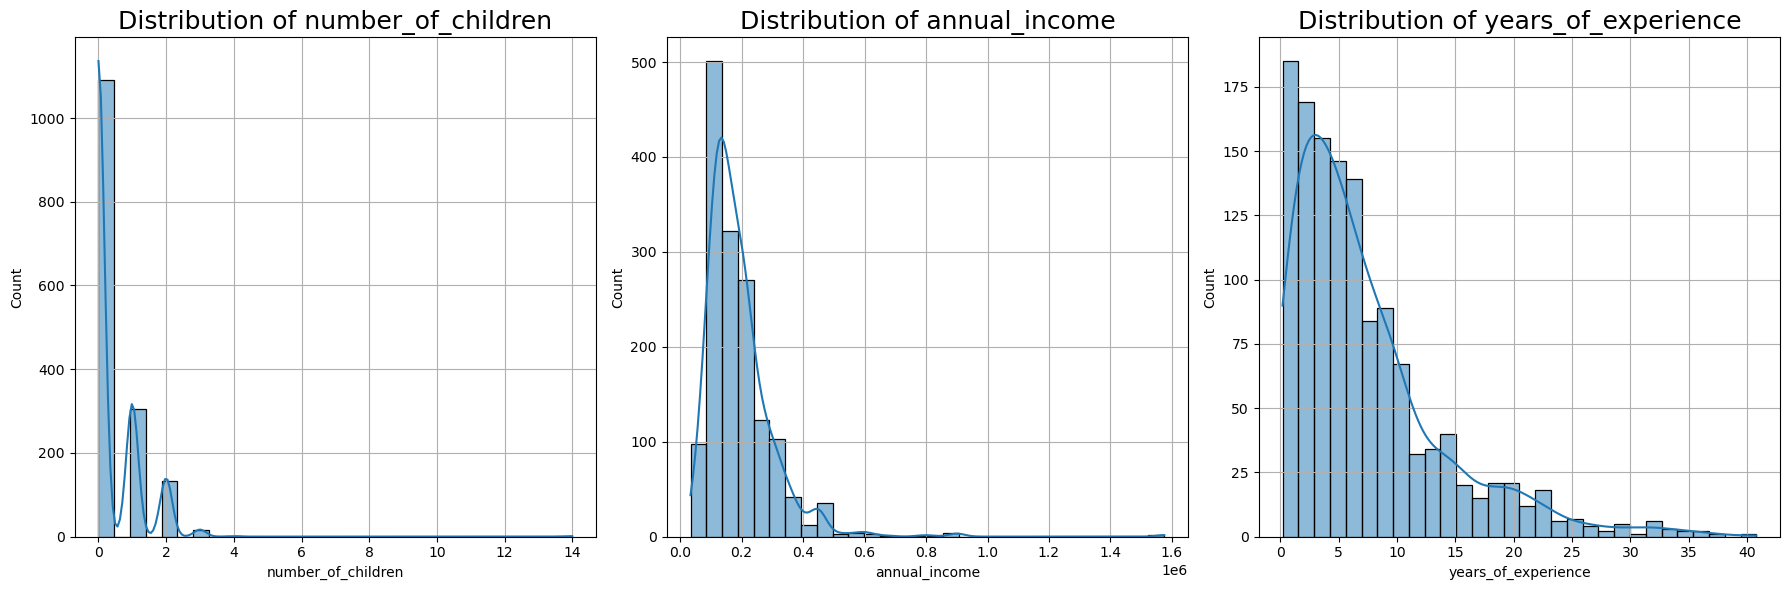

In [24]:
# discrete_numerical_variables = ['number_of_children', 'annual_income', 'birthday_count', 'employed_days', 
#                                 'number_of_family_members', 'age_in_years', 'years_of_experience']


discrete_numerical_variables = ['number_of_children', 'annual_income', 'number_of_family_members', 'age_in_years',
                                'years_of_experience']

def plot_histogram(credit_df, columns):
    for column in columns:
        plt.figure(figsize=(4, 4))
        sns.histplot(data=credit_df, x= column, bins=30 ,kde=True)
        plt.title(f'Histogram of {column}',fontsize=10)
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.xticks(rotation=60)  # Rotate x labels for better readability
        plt.grid(True)
        plt.tight_layout()  # Adjust plot to fit into the figure area
        plt.show()
    
    
plot_histogram(credit_df, discrete_numerical_variables)


#Another method to display various histograms side by side

cols = ['number_of_children', 'annual_income','years_of_experience']

# Set up the figure and axes
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Plot univariate distributions for each column
for i, col in enumerate(cols):
    sns.histplot(data=credit_df, x=col, ax=axes[i], bins=30, kde=True)
    axes[i].set_title(f'Distribution of {col}', fontsize=18)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x')
    axes[i].grid(True)


plt.tight_layout()
plt.show()

In [25]:
# Inferences:
# 1) Most individuals in the dataset either have no children or just one, 
#    with a decreasing number of individuals having two or more children.
# 2) The annual income distribution is predominantly right-skewed, 
#    suggesting that most individuals have a lower to medium income,
#    with a few outliers in the higher income bracket.

<AxesSubplot:xlabel='annual_income'>

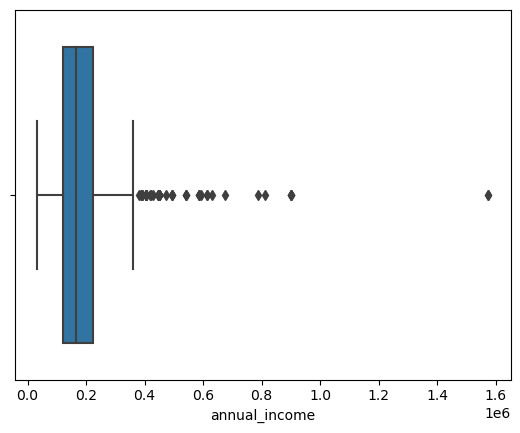

In [26]:
# Annual Income is right skewed
sns.boxplot(x=credit_df['annual_income'])
# sns.boxplot(data=credit_df, x = 'annual_income')

<AxesSubplot:xlabel='years_of_experience'>

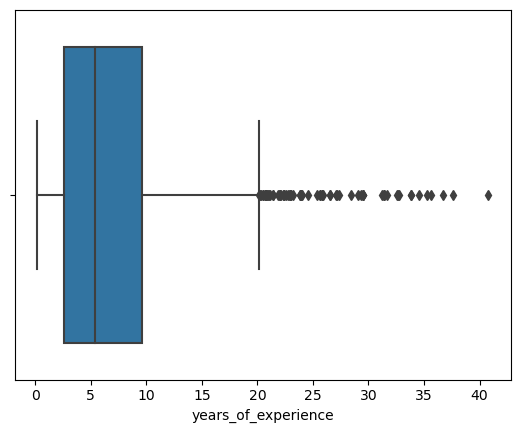

In [27]:
# Experience_years
# The feature Experience_years is right skewed and has some outliers.

sns.boxplot(data=credit_df, x = 'years_of_experience')

In [28]:
credit_df.dtypes

client_id                     int64
gender                       object
car_owner                    object
property_owner               object
number_of_children            int64
annual_income               float64
income_type                  object
education                    object
marital_status               object
housing_type                 object
birthday_count              float64
employed_days                 int64
mobile_phone                  int64
work_phone                    int64
phone                         int64
email_id                      int64
occupation_type              object
number_of_family_members      int64
label                         int64
age_in_years                float64
years_of_experience         float64
employment_status            object
dtype: object

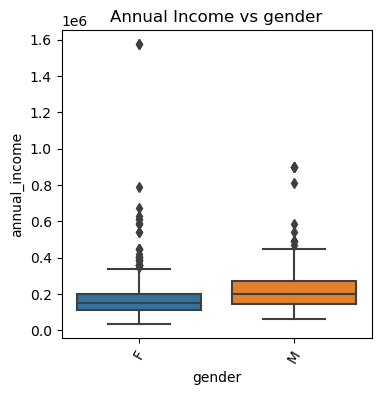

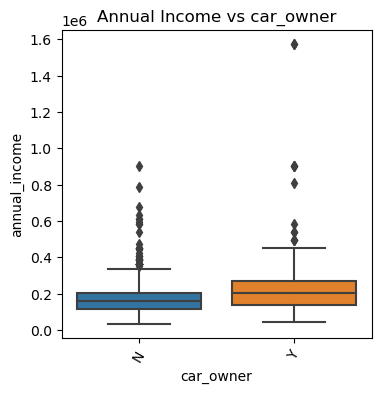

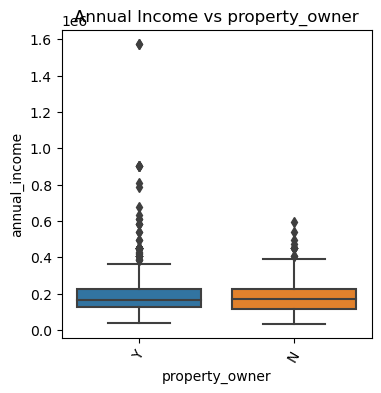

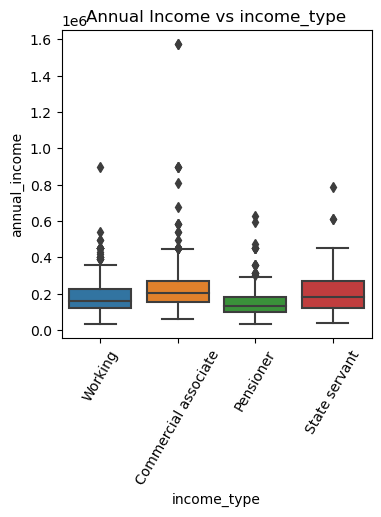

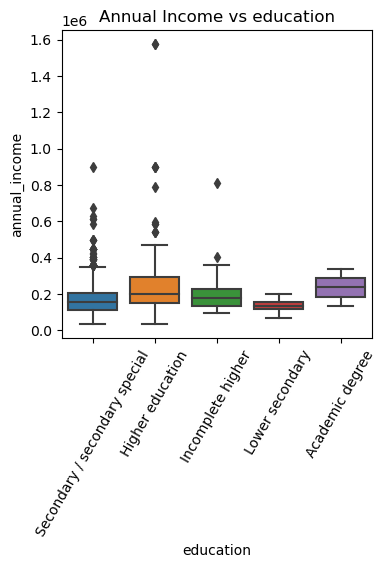

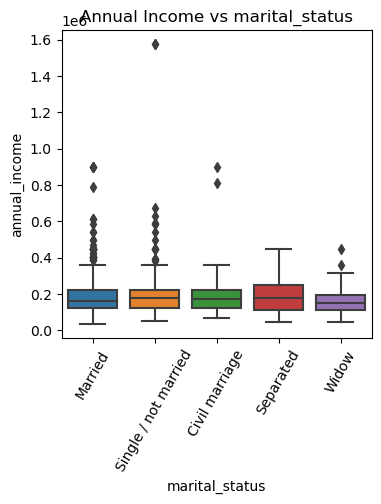

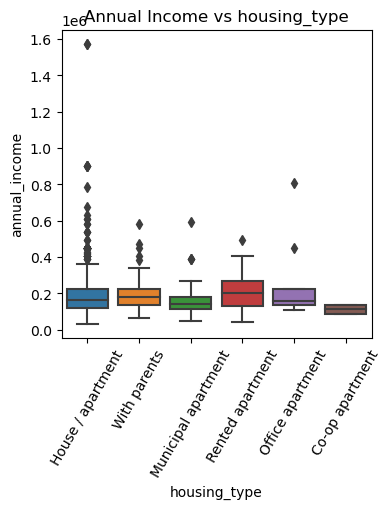

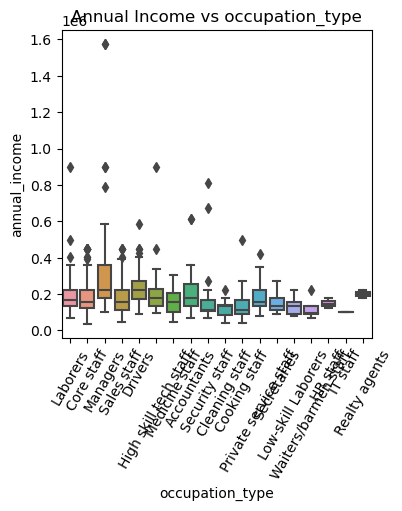

In [29]:
# Exploring Relationships with Categorical Variables

# Annual Income Vs remaning features

remaining_ct_features = ['gender', 'car_owner', 'property_owner','income_type', 'education',
       'marital_status', 'housing_type', 'occupation_type']

for feature in remaining_ct_features:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=feature, y='annual_income',data = credit_df, order=credit_df[feature].value_counts().index)
    plt.title(f'Annual Income vs {feature}')
    plt.xticks(rotation=60)
    plt.show()

In [30]:
# Despite a higher number of female applicants, males generally have a greater income.
# Higher-income applicants are more likely to own cars. The ownership of property doesn't significantly influence the average income.
# Those with an academic degree tend to have the highest annual incomes.
# Additionally, managers and drivers earn more compared to other occupations.
# Applicants with a higher annual income often reside in rented apartments, irrespective of their marital status.

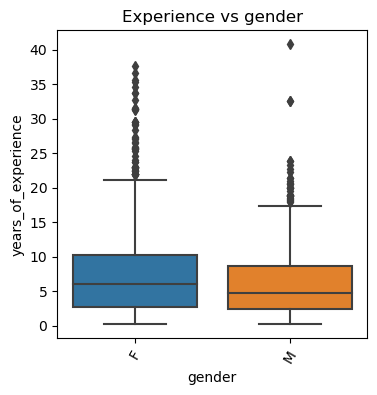

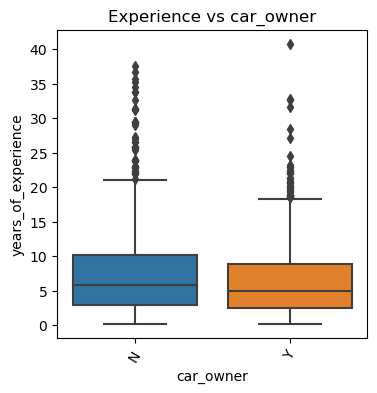

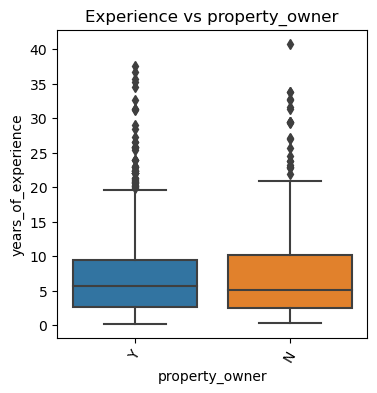

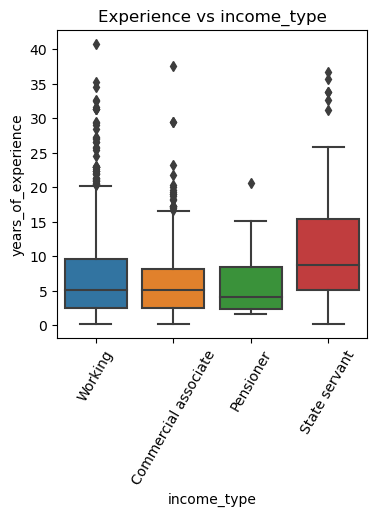

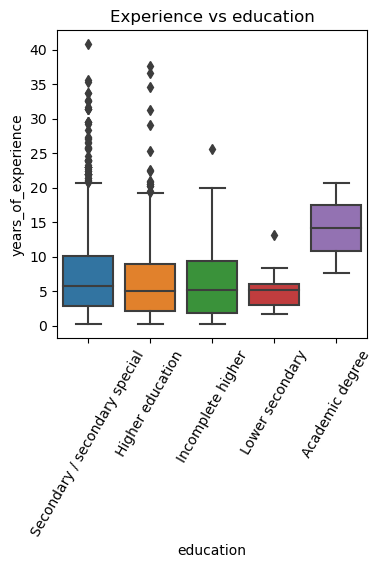

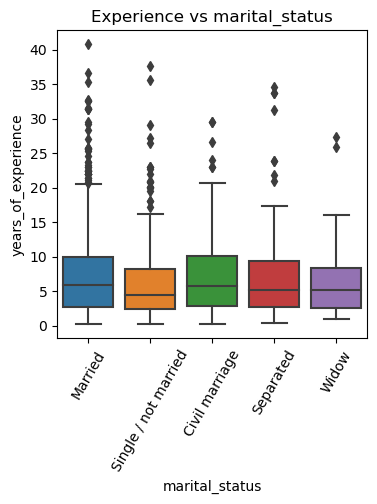

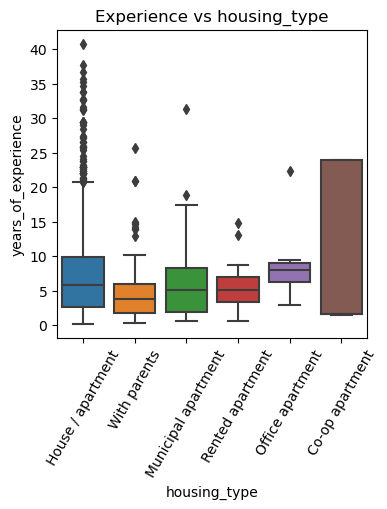

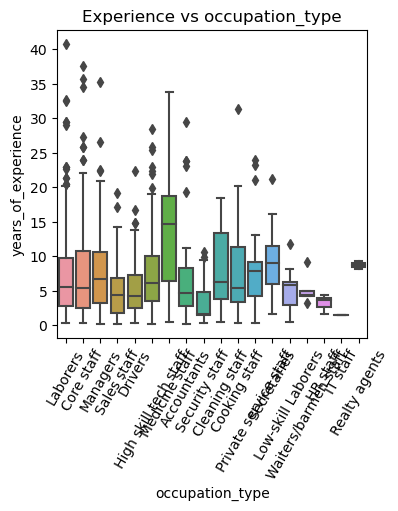

In [31]:
# Experience Vs remaning features
for feature in remaining_ct_features:
    plt.figure(figsize=(4,4))
    sns.boxplot(x=feature, y='years_of_experience',data = credit_df, order=credit_df[feature].value_counts().index)
    plt.title(f'Experience vs {feature}')
    plt.xticks(rotation=60)
    plt.show()

In [32]:
# Both male and female applicants have comparable levels of experience.
# State servants and medicine staff tend to have the most experience among professions.
# Those with an academic degree usually possess more work experience.

In [33]:
# Exploring Relationships with Numerical Variables
remaining_numerical_features = [ 'annual_income','number_of_children','number_of_family_members','age_in_years',
'years_of_experience']
credit_df[remaining_numerical_features].corr()

,annual_income,number_of_children,number_of_family_members,age_in_years,years_of_experience
annual_income,1.000000,0.078497,0.050957,-0.111638,-0.019428
number_of_children,0.078497,1.000000,0.890248,-0.279716,-0.019140
number_of_family_members,0.050957,0.890248,1.000000,-0.266527,-0.006763
age_in_years,-0.111638,-0.279716,-0.266527,1.000000,0.336366
years_of_experience,-0.019428,-0.019140,-0.006763,0.336366,1.000000


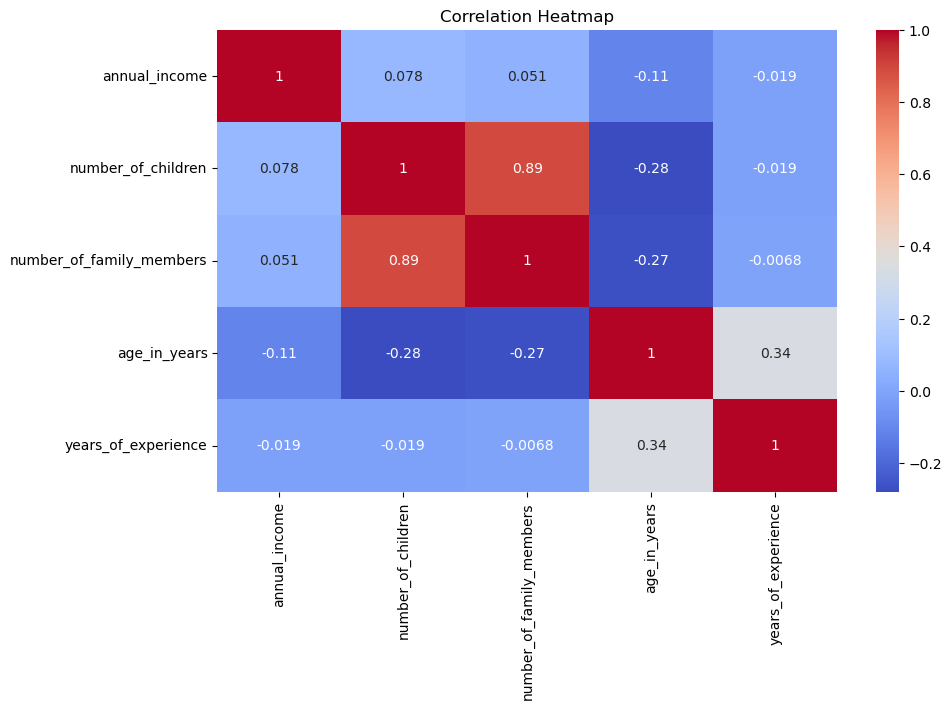

In [34]:
plt.figure(figsize = (10,6))
sns.heatmap(credit_df[remaining_numerical_features].corr(), annot=True , cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [35]:
# Missing Values Imputations
credit_df.isnull().sum()


# Missing values in the below features:
# gender
# annual_income
# birthday_count
# occupation_type
# age_in_years

client_id                     0
gender                        7
car_owner                     0
property_owner                0
number_of_children            0
annual_income                23
income_type                   0
education                     0
marital_status                0
housing_type                  0
birthday_count               22
employed_days                 0
mobile_phone                  0
work_phone                    0
phone                         0
email_id                      0
occupation_type             488
number_of_family_members      0
label                         0
age_in_years                 22
years_of_experience         261
employment_status             0
dtype: int64

In [36]:
credit_df["gender"].unique()

array(['M', 'F', nan], dtype=object)

In [37]:
# For gender, fill with the Mode (Most Frequent Value)

mode_gender = credit_df['gender'].mode()[0]
credit_df['gender'].fillna(mode_gender, inplace=True)

In [38]:
print(credit_df['annual_income'].unique())

[ 180000.   315000.        nan  450000.    90000.   472500.   270000.
  126000.   202500.   157500.   112500.   540000.   292500.   135000.
   76500.   215100.   225000.    67500.   171000.   103500.    99000.
  391500.    65250.    72900.   360000.   256500.   675000.   247500.
   85500.   121500.   130500.   211500.    81000.    72000.   148500.
  162000.   195750.   585000.   216000.   306000.   108000.    63000.
   45000.   337500.   131400.   117000.   445500.   234000.  1575000.
  144000.    67050.    73350.   193500.   900000.    94500.   198000.
   54000.   166500.   167400.   153000.   423000.   243000.   283500.
  252000.   495000.   612000.    36000.   139500.   133650.   427500.
  261000.   231750.    90900.    45900.   119250.    58500.   328500.
  787500.   594000.   119700.    69372.    37800.   387000.   207000.
  189000.   333000.   105750.   382500.   141750.    40500.   405000.
   44550.   301500.   351000.   175500.   121900.5  238500.    33750.
  116100.   297000. 

In [39]:
# For annual_income, fill with the mean value. However first group the types of income and then take its mean.
mean_by_grouping_income_types = credit_df.groupby('income_type')['annual_income'].transform('mean')
print(mean_by_grouping_income_types.unique())
credit_df['annual_income']= credit_df['annual_income'].fillna(mean_by_grouping_income_types)

[155175.09622642 234600.         181048.75730623 211422.4137931 ]


In [40]:
credit_df.isnull().sum()

client_id                     0
gender                        0
car_owner                     0
property_owner                0
number_of_children            0
annual_income                 0
income_type                   0
education                     0
marital_status                0
housing_type                  0
birthday_count               22
employed_days                 0
mobile_phone                  0
work_phone                    0
phone                         0
email_id                      0
occupation_type             488
number_of_family_members      0
label                         0
age_in_years                 22
years_of_experience         261
employment_status             0
dtype: int64

In [41]:
# For age_in_years, fill with the mean value.
mean_age= credit_df['age_in_years'].mean()
credit_df['age_in_years'] = credit_df['age_in_years'].fillna(mean_age)


In [42]:
credit_df['occupation_type'].isnull().sum()

488

In [43]:
# For occupation_type, drop the column as multiple values are missing
credit_df['occupation_type'].value_counts().sum()

1060

In [44]:
credit_df.drop(columns = ['occupation_type'], inplace = True)

In [45]:
credit_df.shape

(1548, 21)

In [46]:
credit_df.columns

Index(['client_id', 'gender', 'car_owner', 'property_owner',
       'number_of_children', 'annual_income', 'income_type', 'education',
       'marital_status', 'housing_type', 'birthday_count', 'employed_days',
       'mobile_phone', 'work_phone', 'phone', 'email_id',
       'number_of_family_members', 'label', 'age_in_years',
       'years_of_experience', 'employment_status'],
      dtype='object')

In [47]:
# For years_of_experience, fill with the median value.
# Robustness to Outliers:
# The median is the middle value in a sorted list of numbers, which makes it more robust to outliers. 
# If your data has extreme values (e.g., someone with significantly more or less experience), 
# the median won't be skewed by these outliers.
# The mean, on the other hand, can be heavily influenced by outliers, 
# leading to an inaccurate representation of the central tendency for the majority of your data.
# If the years_of_experience data is skewed (e.g., most individuals have a few years of experience, but a small number have many years), 
# the median will give a better central measure.
# The mean can be misleading in skewed distributions because it could be pulled toward the tail, 
# making it less representative of the typical value.

credit_df['years_of_experience'].fillna(credit_df['years_of_experience'].median(), inplace=True)

In [48]:
# Outlier Treatment for 
# 1) annual_income, 
# 2) years_of_experience, 
# 3) number_of_family_members

# annual_income
q1_annual_income = np.percentile(credit_df['annual_income'],25)
q3_annual_income = np.percentile(credit_df['annual_income'],75)
iqr_annual_income = q3_annual_income-q1_annual_income
lower_fence_annual_income = q1_annual_income - (1.5*iqr_annual_income)
higher_fence_annual_income = q3_annual_income + (1.5*iqr_annual_income)
higher_fence_annual_income

380250.0

<AxesSubplot:xlabel='annual_income'>

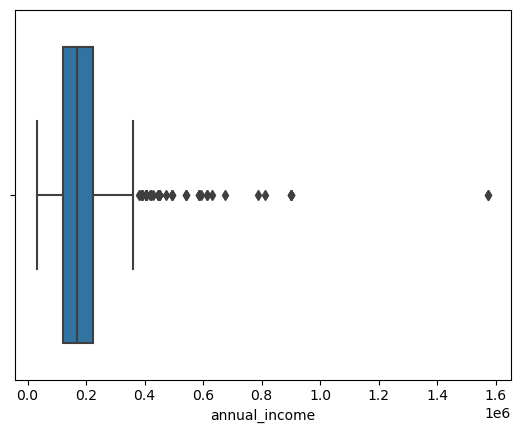

In [49]:
sns.boxplot(x=credit_df['annual_income'])


<AxesSubplot:xlabel='annual_income'>

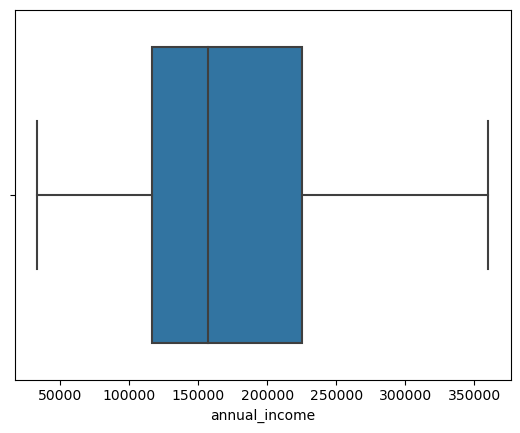

In [50]:
credit_df = credit_df[credit_df['annual_income'] < higher_fence_annual_income]
sns.boxplot(x=credit_df['annual_income'])

<AxesSubplot:xlabel='annual_income', ylabel='Count'>

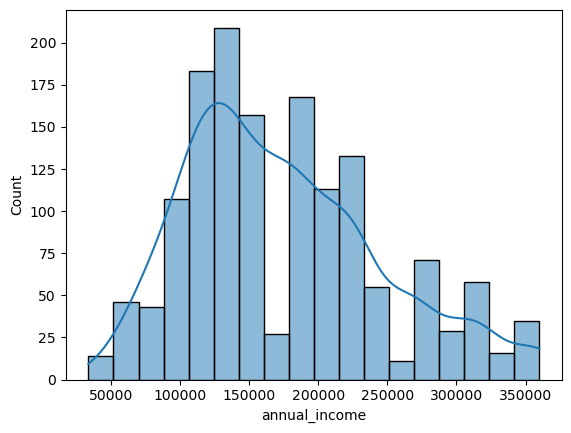

In [51]:
sns.histplot(data=credit_df, x='annual_income',kde=True)

In [52]:
# Outliers in years_of_experience

q1_years_of_experience = np.percentile(credit_df['years_of_experience'],25)
q3_years_of_experience = np.percentile(credit_df['years_of_experience'],75)
iqr_years_of_experience = q3_years_of_experience - q1_years_of_experience
lower_fence_years_of_experience = q1_years_of_experience - (1.5 * iqr_years_of_experience)
higher_fence_years_of_experience = q3_years_of_experience + 1.5 * iqr_years_of_experience
higher_fence_years_of_experience

16.795890410958904

<AxesSubplot:xlabel='years_of_experience'>

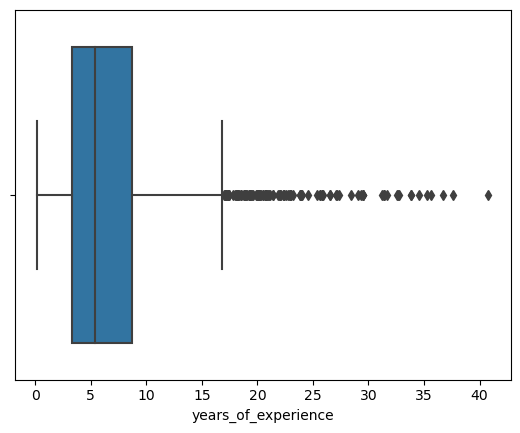

In [53]:
sns.boxplot(x=credit_df['years_of_experience'])

<AxesSubplot:xlabel='years_of_experience', ylabel='Count'>

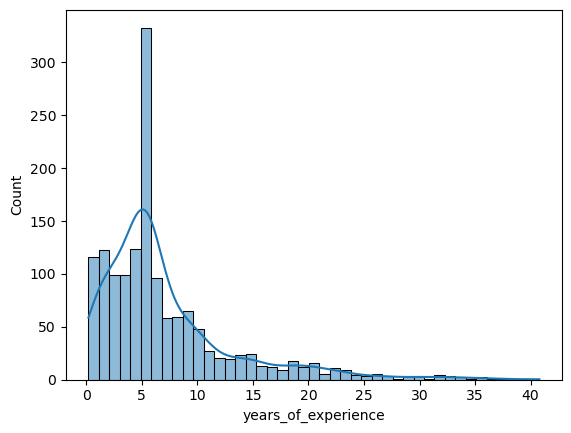

In [54]:
sns.histplot(data=credit_df, x='years_of_experience',kde=True)

In [55]:
credit_df = credit_df[credit_df['years_of_experience'] < higher_fence_years_of_experience]

<AxesSubplot:xlabel='years_of_experience'>

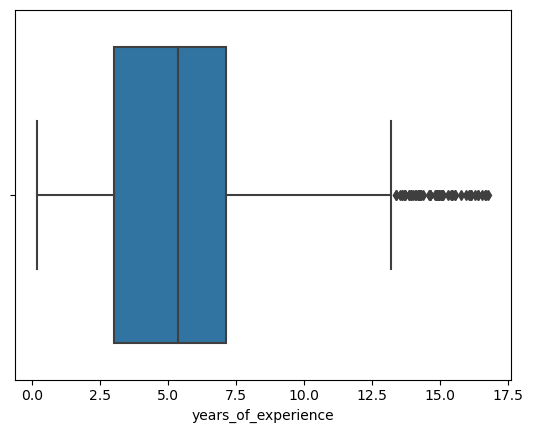

In [56]:
sns.boxplot(x=credit_df['years_of_experience'])

In [57]:
# Even after applying the IQR method to filter outliers, we notice outliers. This can happen due to a few reasons:

# Extreme Values within the Threshold: Some values may be close to the calculated threshold but still fall within the range. 
# These values, while not considered statistical outliers by the IQR method, 
# can still be visually represented as points outside the whiskers in a boxplot.

# The IQR method assumes a symmetric distribution,but if the data is skewed, the thresholds might not effectively capture the outliers.

# Hence we apply a square root transformation to the data to help normalize the distribution.

In [58]:
credit_df['years_of_experience'] = np.sqrt(credit_df['years_of_experience'])

<AxesSubplot:xlabel='years_of_experience'>

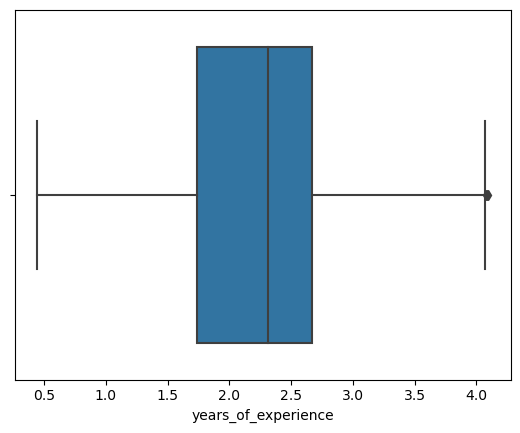

In [59]:
sns.boxplot(x=credit_df['years_of_experience'])

<AxesSubplot:xlabel='number_of_family_members'>

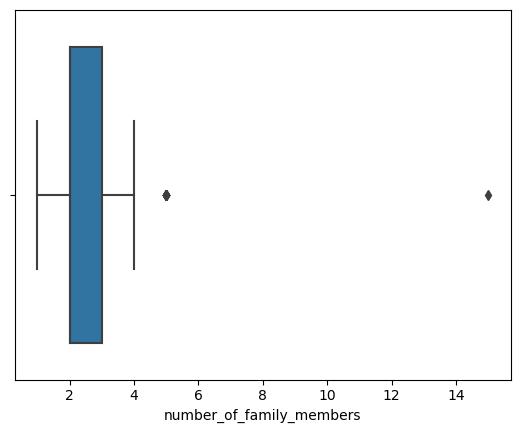

In [60]:
# Outliers in number_of_family_members

sns.boxplot(x=credit_df['number_of_family_members'])

<AxesSubplot:xlabel='number_of_family_members', ylabel='Count'>

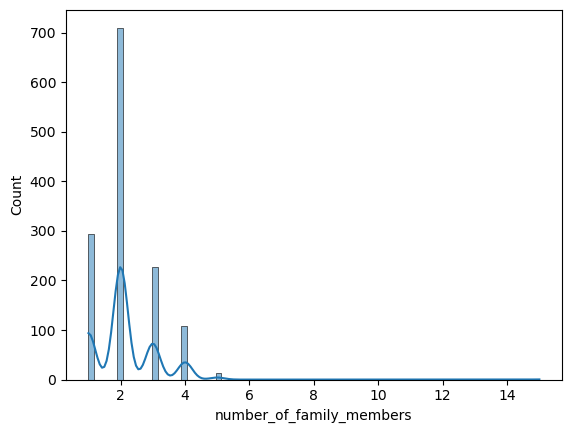

In [61]:
sns.histplot(data=credit_df, x='number_of_family_members',kde=True)

In [62]:
q1_number_of_family_members = np.percentile(credit_df['number_of_family_members'],25)
q3_number_of_family_members = np.percentile(credit_df['number_of_family_members'],75)
iqr_number_of_family_members = q3_number_of_family_members - q1_number_of_family_members
lower_fence_number_of_family_members = q1_number_of_family_members - (1.5 * iqr_number_of_family_members)
higher_fence_number_of_family_members = q3_number_of_family_members + 1.5 * iqr_number_of_family_members
higher_fence_number_of_family_members

4.5

In [63]:
credit_df = credit_df[credit_df['number_of_family_members'] < higher_fence_number_of_family_members]

<AxesSubplot:xlabel='number_of_family_members'>

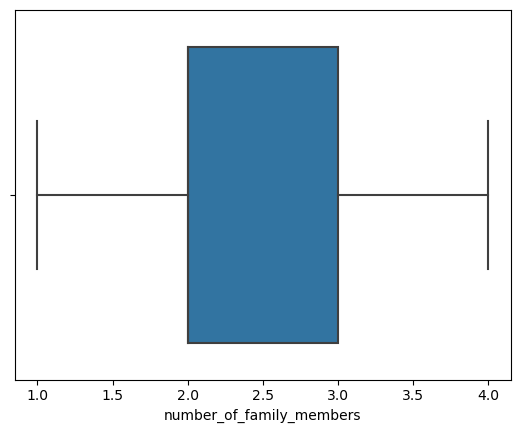

In [64]:
sns.boxplot(x=credit_df['number_of_family_members'])

In [65]:
#dropping mobile_phone column as it contains only one value. Hence does not add much value. 

credit_df = credit_df.drop(columns = ['mobile_phone'])

#dropping birthday_count column as it contains some missing value. We already have age_in_years column so
# we do not need birthday_count, hence dropping.
credit_df = credit_df.drop(columns = ['birthday_count'])

In [66]:
#Export cleaned data
credit_df.to_csv('cleaned_data.csv')

In [67]:
credit_df.columns


Index(['client_id', 'gender', 'car_owner', 'property_owner',
       'number_of_children', 'annual_income', 'income_type', 'education',
       'marital_status', 'housing_type', 'employed_days', 'work_phone',
       'phone', 'email_id', 'number_of_family_members', 'label',
       'age_in_years', 'years_of_experience', 'employment_status'],
      dtype='object')

In [68]:
credit_df.sample(5)

,client_id,gender,car_owner,property_owner,number_of_children,annual_income,income_type,education,marital_status,housing_type,employed_days,work_phone,phone,email_id,number_of_family_members,label,age_in_years,years_of_experience,employment_status
1193,5033496,M,Y,N,1,202500.0,Commercial associate,Higher education,Married,With parents,-444,0,0,0,3,0,27.276712,1.102923,Employed
1497,5010344,F,N,N,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,365243,0,0,0,2,0,62.649315,2.313155,Unemployed
1232,5028302,M,Y,Y,0,360000.0,Commercial associate,Incomplete higher,Married,House / apartment,-477,0,0,0,2,0,54.339726,1.143175,Employed
697,5116613,M,N,Y,0,225000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-3533,0,0,0,2,0,32.350685,3.111182,Employed
658,5116640,F,N,Y,1,202500.0,Working,Secondary / secondary special,Married,House / apartment,-732,0,0,1,3,0,43.298630,1.416150,Employed


In [69]:
#Feature Transformation


# 'gender', 'car_owner', 'property_owner', 'employment_status' - Encoding these using Binary Encoding

credit_df['gender'] = credit_df['gender'].map({'M':1, 'F':0})
credit_df['car_owner'] = credit_df['car_owner'].map({'Y':1, 'N':0})
credit_df['property_owner'] = credit_df['property_owner'].map({'Y':1, 'N':0})
credit_df['employment_status'] = credit_df['employment_status'].map({'Employed':1, 'Unemployed':0})


In [70]:
credit_df.sample(5)

,client_id,gender,car_owner,property_owner,number_of_children,annual_income,income_type,education,marital_status,housing_type,employed_days,work_phone,phone,email_id,number_of_family_members,label,age_in_years,years_of_experience,employment_status
1011,5048305,0,0,0,0,181048.757306,Working,Higher education,Separated,House / apartment,-1526,0,0,0,1,0,59.964384,2.044706,1
1313,5056179,0,0,1,0,202500.000000,Commercial associate,Higher education,Married,House / apartment,-218,0,0,0,2,0,26.473973,0.772826,1
1183,5126503,0,0,0,0,171000.000000,Pensioner,Secondary / secondary special,Married,House / apartment,365243,0,1,0,2,0,57.471233,2.313155,0
733,5041675,0,1,1,1,333000.000000,Commercial associate,Higher education,Married,House / apartment,-1616,0,0,0,3,0,31.575342,2.104138,1
406,5029352,1,1,1,0,270000.000000,Working,Higher education,Married,House / apartment,-412,0,0,0,2,0,29.978082,1.062435,1


In [71]:
# To convert the categorical data, we have nominal and ordinal data. 

# Nominal Data - income_type, marital_status, housing_type
# Ordinal Data - education

# For Ordinal data, we will use ordinal encoding. Ordinal encoding will assign a unique integer to each category, 
# based on the order of the categories. The categories are replaced with their corresponding integer values.

# For Nominal data, we using one-hot encoding. As categories do not have an inherent order, the categorical variables
# will be convereted to binary columns (0 or 1). 

In [72]:
# Ordinal Data - education

credit_df['education'].value_counts()

Secondary / secondary special    899
Higher education                 356
Incomplete higher                 62
Lower secondary                   21
Academic degree                    1
Name: education, dtype: int64

In [73]:
from sklearn.preprocessing import OrdinalEncoder

education_order = ['Lower secondary', 'Secondary / secondary special', 'Incomplete higher','Higher education','Academic degree']
x = OrdinalEncoder(categories = [education_order])
credit_df['education'] = x.fit_transform(credit_df[['education']])

In [74]:
credit_df.sample(5)

,client_id,gender,car_owner,property_owner,number_of_children,annual_income,income_type,education,marital_status,housing_type,employed_days,work_phone,phone,email_id,number_of_family_members,label,age_in_years,years_of_experience,employment_status
1455,5052622,1,1,1,1,180000.0,Commercial associate,1.0,Married,House / apartment,-1994,0,1,0,3,0,43.802740,2.337309,1
672,5010567,0,1,1,0,121500.0,Working,3.0,Married,House / apartment,-1682,0,0,1,2,0,27.794521,2.146676,1
804,5029538,0,0,1,0,112500.0,Working,3.0,Civil marriage,House / apartment,-1205,0,0,0,2,0,35.021918,1.816967,1
685,5023092,0,0,0,0,202500.0,Working,1.0,Separated,House / apartment,-4161,0,0,0,1,0,46.213699,3.376389,1
1084,5118560,0,0,1,0,126000.0,Working,1.0,Single / not married,House / apartment,-2896,0,1,0,1,0,46.161644,2.816779,1


In [75]:
credit_df['income_type'].value_counts()

Working                 687
Commercial associate    309
Pensioner               259
State servant            84
Name: income_type, dtype: int64

In [76]:
one_hot_cols = ['income_type','marital_status', 'housing_type']
credit_df = pd.get_dummies(credit_df, columns = one_hot_cols, drop_first = True)

In [77]:
credit_df.sample(5)

,client_id,gender,car_owner,property_owner,number_of_children,annual_income,education,employed_days,work_phone,phone,...,income_type_Working,marital_status_Married,marital_status_Separated,marital_status_Single / not married,marital_status_Widow,housing_type_House / apartment,housing_type_Municipal apartment,housing_type_Office apartment,housing_type_Rented apartment,housing_type_With parents
244,5046415,1,1,1,0,270000.0,3.0,-1569,0,1,...,1,1,0,0,0,1,0,0,0,0
488,5118115,1,0,0,1,270000.0,1.0,-5422,1,1,...,0,1,0,0,0,1,0,0,0,0
1490,5114348,1,1,0,0,180000.0,1.0,-2993,1,0,...,0,1,0,0,0,0,1,0,0,0
1163,5117254,0,1,1,0,207000.0,3.0,-3506,0,0,...,0,1,0,0,0,1,0,0,0,0
1412,5033608,0,0,0,0,67500.0,1.0,-171,0,0,...,0,0,0,0,0,1,0,0,0,0


In [78]:
# Imbalance in Dataset

# Bar plot above clearly showed that the dataset is isimbalanced as 
# there is a huge difference between approved (0) and rejected (1) applications in the label column.
credit_df['label'].value_counts()

0    1192
1     147
Name: label, dtype: int64

In [79]:
# As this is a binary classification problem, SMOTE can be used to handle the imbalance in data.
# SMOTE is applied only on the training set after splitting the data into training and test sets. 
# This ensures that the test data remains untouched and represents the real-world distribution. 
# The model is trained on the balanced training set and evaluated on the original, imbalanced test set.
X = credit_df.drop(columns = ['label'])
y = credit_df['label']

In [80]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [81]:
# Feature Scaling

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train_resampled)

X_test_scaled = scaler.transform(X_test)

In [82]:
# Model Training - Supervised Learning

log_reg = LogisticRegression(random_state=42, class_weight='balanced')
dtc = DecisionTreeClassifier(random_state=10, class_weight='balanced')
rfc = RandomForestClassifier(random_state=42, class_weight='balanced')
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
svc = SVC(random_state=42, class_weight='balanced')
knn = KNeighborsClassifier()

classifiers = [
    ('Logistic Regression',log_reg),
    ('Decision Tree', dtc),
    ('Random Forest', rfc),
    ('XGBoost', xgb),
    ('Support Vector Machine', svc),
    ('K-Nearest Neighbors', knn)
]

results = {}

for name, clf in classifiers:
    clf.fit(X_train_scaled, y_train_resampled)  
    y_pred = clf.predict(X_test_scaled)         
    
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc_test = roc_auc_score(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1 , roc_auc_test]
    
    
    print(f"Classifier: {name}")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    
results_df = pd.DataFrame(results, index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC Score']).T
print(results_df)

Classifier: Logistic Regression
Accuracy: 0.7611940298507462
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.82      0.86       242
           1       0.12      0.23      0.16        26

    accuracy                           0.76       268
   macro avg       0.51      0.52      0.51       268
weighted avg       0.83      0.76      0.79       268

--------------------------------------------------
Classifier: Decision Tree
Accuracy: 0.8432835820895522
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       242
           1       0.29      0.42      0.34        26

    accuracy                           0.84       268
   macro avg       0.61      0.66      0.63       268
weighted avg       0.87      0.84      0.86       268

--------------------------------------------------
Classifier: Random Forest
Accuracy: 0.9029850746268657
Classification Report:
    

In [83]:
# Accuracy: Random Forest and XGBoost have the highest accuracy.
# Precision: Random Forest has the highest precision, followed by XGBoost.
# Recall: XGBoost and Decision Tree have the highest recall.
# F1-Score: XGBoost has the highest F1-Score, followed by Random Forest.
# ROC AUC Score: XGBoost has the highest ROC AUC Score, indicating it performs best in distinguishing between classes.


# XGBoost appears to be the best performing model overall, 
# as it has the highest F1-Score and ROC AUC Score, 
# indicating a good balance between precision and recall and overall classification performance.

Accuracy: 0.8880597014925373
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       242
           1       0.43      0.46      0.44        26

    accuracy                           0.89       268
   macro avg       0.69      0.70      0.69       268
weighted avg       0.89      0.89      0.89       268

--------------------------------------------------


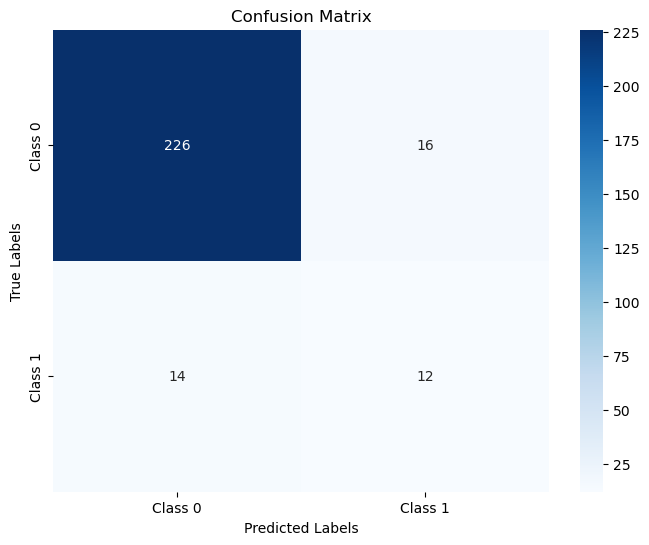

In [84]:
# Displaying the confusion matrix for XGBoost
y_pred_xgb = xgb.predict(X_test_scaled)


print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))
print("-" * 50)

cm = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()